Utilisation d'un TF-IDF et RandomForrest

Au final: weighted f1-score: 0.78

In [1]:
import os

# Désactiver le GPU en définissant CUDA_VISIBLE_DEVICES à un vide#
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [1]:
import importlib

from RktnChallenge.RktnModel import ModelTrainer

from RktnChallenge.preprocessing.tokenizeString import tokenizeString
from RktnChallenge.preprocessing.filterStopWords import filterStopWords
from RktnChallenge.preprocessing.mergeFeatures import mergeFeatures
from RktnChallenge.preprocessing.mostOccur import mostOccur
from RktnChallenge.preprocessing.Dropper import Dropper
from RktnChallenge.preprocessing.TokenListToString import TokenListToString

2023-09-08 10:13:58.067959: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-08 10:13:58.559313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 10:13:59.935469: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
RktnModel = ModelTrainer("data_tr_lemm.csv")

Vectorization des données

In [3]:
_X = RktnModel.data["merged_desi_desc"]

max_features = 13000

RktnModel.create_vectorizer(name="tfidf", X = _X, ngram_range=(1,3),max_features=max_features)
X_data = RktnModel.vectorizer_transform(_X)     


y = RktnModel.encodeLabel("prdtypecode")
label_size = RktnModel.getLabelSize()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.20, random_state = 42)


In [6]:
del RktnModel

Definition d'un modele

In [5]:
import gc

gc.collect()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRUCell,RNN,GRU, Dense,Dropout,GlobalAveragePooling2D, LSTM, Flatten, Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.models import Model





model = Sequential([
    Dense(units=max_features, activation="relu", input_shape=(max_features,)),
    Dropout(0.3),
    Dense(units=6000, activation="relu"),
    Dropout(0.3),
    Dense(units=1024, activation="relu"),
    Dropout(0.3),
    Dense(units=512, activation="relu"),
    Dropout(0.3),
    Dense(units=256, activation="relu"),
    Dropout(0.3),
    Dense(units=label_size, activation="softmax")
])


 
optimizer = AdamW(weight_decay=0.01, learning_rate=0.001) 
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

2023-09-08 10:16:08.295115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13000)             169013000 
                                                                 
 dropout (Dropout)           (None, 13000)             0         
                                                                 
 dense_1 (Dense)             (None, 6000)              78006000  
                                                                 
 dropout_1 (Dropout)         (None, 6000)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              6145024   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               5

2023-09-08 10:16:08.609984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 10:16:08.610294: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 10:16:08.612919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 10:16:08.613257: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-08 10:16:08.613573: I tensorflow/compile

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10


2023-09-08 10:16:20.925517: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8e3f3e50b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-08 10:16:20.925561: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA TITAN X (Pascal), Compute Capability 6.1
2023-09-08 10:16:21.005654: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-08 10:16:21.336312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-08 10:16:21.598297: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


544/544 [==============================] - 47s 80ms/step - loss: 1.2550 - accuracy: 0.6490 - val_loss: 0.8251 - val_accuracy: 0.7709
Epoch 2/10
544/544 [==============================] - 43s 78ms/step - loss: 0.6582 - accuracy: 0.8195 - val_loss: 0.7723 - val_accuracy: 0.7867
Epoch 3/10
544/544 [==============================] - 41s 76ms/step - loss: 0.4527 - accuracy: 0.8720 - val_loss: 0.8349 - val_accuracy: 0.7873
Epoch 4/10
544/544 [==============================] - 41s 76ms/step - loss: 0.3426 - accuracy: 0.9036 - val_loss: 0.9330 - val_accuracy: 0.7926
Epoch 5/10
544/544 [==============================] - 43s 79ms/step - loss: 0.2710 - accuracy: 0.9230 - val_loss: 1.0406 - val_accuracy: 0.7931
Epoch 6/10
544/544 [==============================] - 42s 78ms/step - loss: 0.2324 - accuracy: 0.9335 - val_loss: 1.1069 - val_accuracy: 0.7880
Epoch 7/10
 77/544 [===>..........................] - ETA: 35s - loss: 0.2017 - accuracy: 0.9432

KeyboardInterrupt: 

531/531 [==============================] - 4s 7ms/step
weighted F1 score: 0.7832968302518724


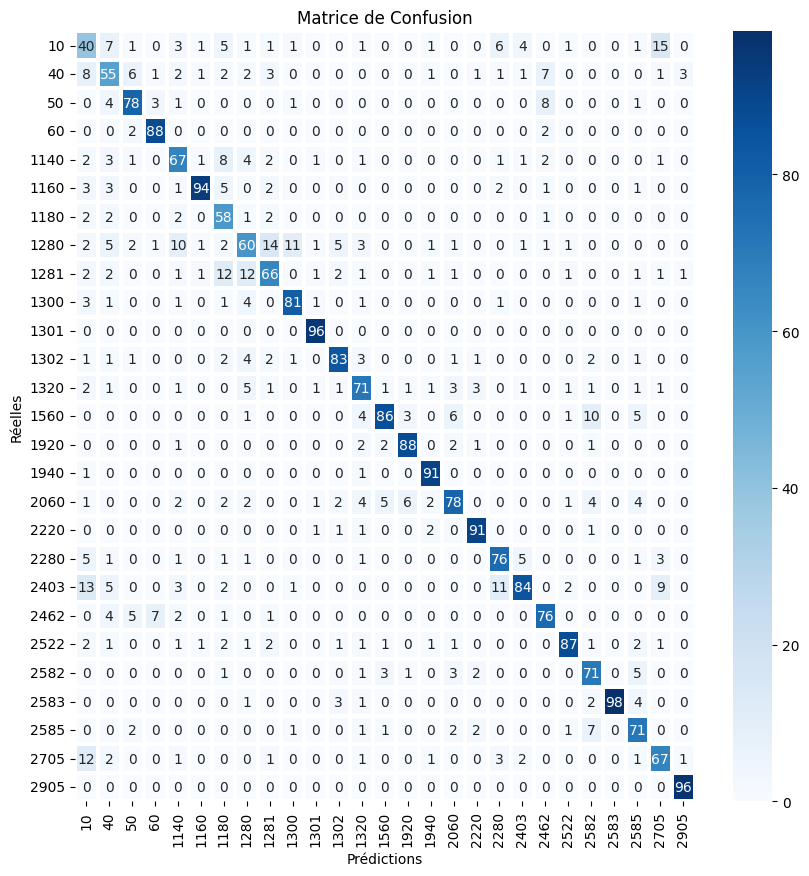

In [7]:
y_pred_test = model.predict(X_test)
y_pred_id = y_pred_test.argmax(axis=-1)

RktnModel.evaluateTestResults(y_test,y_pred_id)


max_feature à 1000:
si taille = 1 52%
si taille = 2 64%
si taille = 400 76%
si taille = 1000 76%

je fais varier max_feature à 13 000 :
si taille = 100 76.52
si taille = 1000 78%

Max BoW = 76%